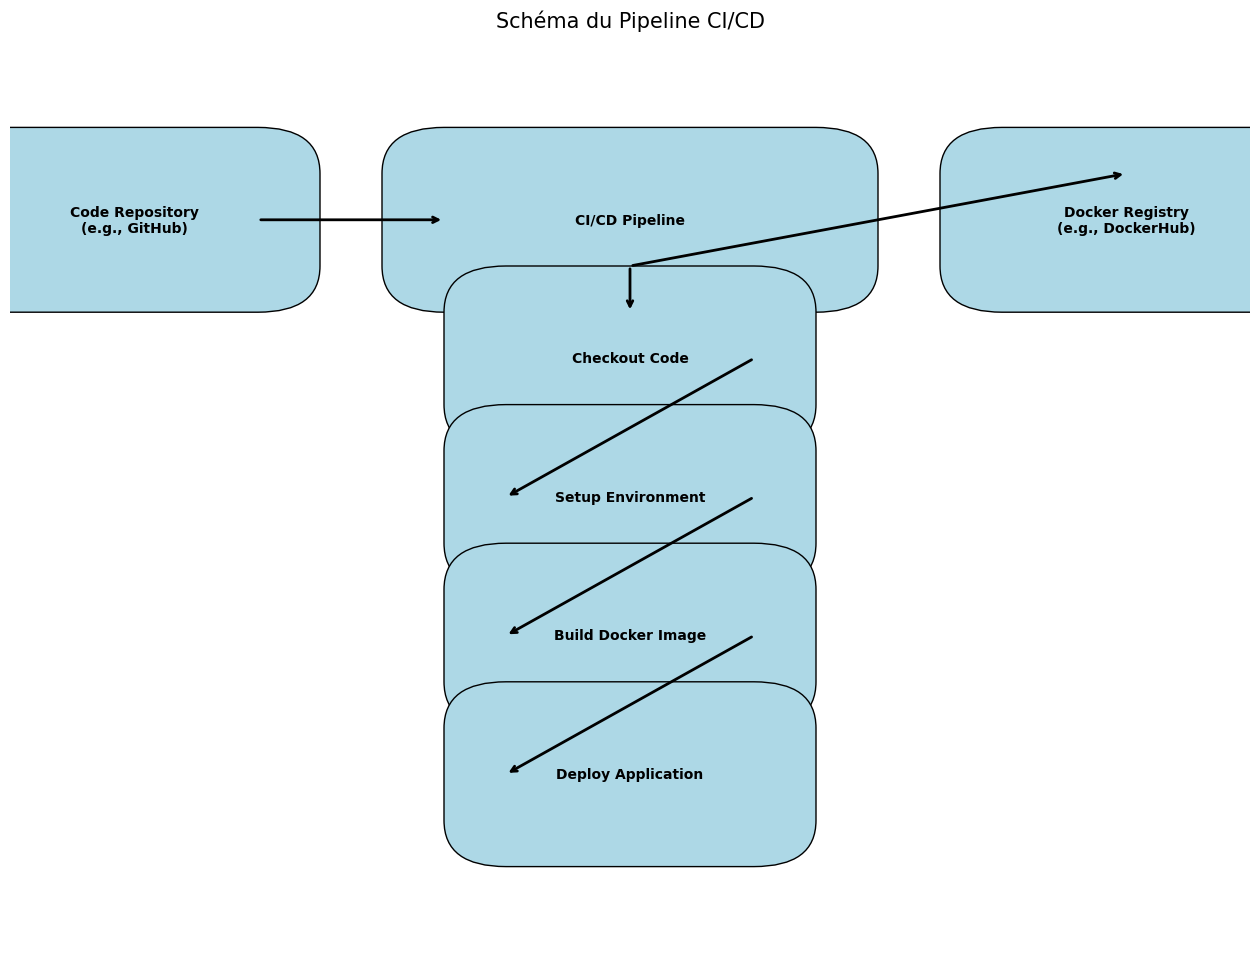

'pipeline_ci_cd_schema_expanded.png'

In [4]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a new figure
fig, ax = plt.subplots(figsize=(16, 12))

# Define positions of elements with more spacing
elements = {
    "Code Repository\n(e.g., GitHub)": (0.1, 0.8),
    "CI/CD Pipeline": (0.5, 0.8),
    "Docker Registry\n(e.g., DockerHub)": (0.9, 0.8),
    "Checkout Code": (0.5, 0.65),
    "Setup Environment": (0.5, 0.5),
    "Build Docker Image": (0.5, 0.35),
    "Deploy Application": (0.5, 0.2)
}

# Add elements to the plot
boxes = {}
for text, (x, y) in elements.items():
    width = 0.3 if "Pipeline" in text else 0.2
    height = 0.1 if "Pipeline" in text else 0.1
    box = patches.FancyBboxPatch((x - width/2, y - height/2), width, height, boxstyle="round,pad=0.05", edgecolor='black', facecolor='lightblue')
    ax.add_patch(box)
    boxes[text] = box
    ax.text(x, y, text, horizontalalignment='center', verticalalignment='center', fontsize=10, fontweight='bold')

# Add arrows for interactions
arrowprops = dict(facecolor='black', arrowstyle='->', lw=2)
interactions = [
    ("Code Repository\n(e.g., GitHub)", "CI/CD Pipeline"),
    ("CI/CD Pipeline", "Docker Registry\n(e.g., DockerHub)"),
    ("CI/CD Pipeline", "Checkout Code"),
    ("Checkout Code", "Setup Environment"),
    ("Setup Environment", "Build Docker Image"),
    ("Build Docker Image", "Deploy Application")
]

for start, end in interactions:
    start_box = boxes[start]
    end_box = boxes[end]
    if "Pipeline" in start:
        start_x, start_y = start_box.get_x() + start_box.get_width() / 2, start_box.get_y()
        end_x, end_y = end_box.get_x() + end_box.get_width() / 2, end_box.get_y() + end_box.get_height()
    else:
        start_x, start_y = start_box.get_x() + start_box.get_width(), start_box.get_y() + start_box.get_height() / 2
        end_x, end_y = end_box.get_x(), end_box.get_y() + end_box.get_height() / 2
    ax.annotate('', xy=(end_x, end_y), xytext=(start_x, start_y), arrowprops=arrowprops)

# Set the limits and title
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_title('Schéma du Pipeline CI/CD', fontsize=15)

# Remove the axes
ax.axis('off')

# Save the plot to a file
file_path = 'pipeline_ci_cd_schema_expanded.png'
plt.savefig(file_path, bbox_inches='tight')
plt.show()

file_path
